In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

import imageio
import glob

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout

Using TensorFlow backend.


In [2]:
sampleSize = 1500

In [16]:
train = sio.loadmat('data/train_32x32.mat')
X_train = train['X']
y_train = train['y']

In [17]:
test = sio.loadmat('data/test_32x32.mat')
X_test = test['X']
y_test = test['y']

In [5]:
#y_train = to_categorical(y_train)
#y_test = to_categorical(y_test)

In [18]:
X_train_sample = X_train[:,:,:,0:sampleSize]
y_train_sample = y_train[0:sampleSize,:]
X_test_sample = X_test[:,:,:,0:int(sampleSize/2)]
y_test_sample = y_test[0:int(sampleSize/2),:]

In [7]:
def resizeImages(imageArray):
    images=[]
    for img in range(len(imageArray[0,0,0])):
        tempw = []
        for width in range(32):
            temph=[]
            for height in range(32):
                tempd = []
                for depth in range(3):
                    tempd.append(imageArray[width,height,depth,img])
                grayscale = [0.2125*tempd[0] + 0.7154*tempd[1] + 0.0721*tempd[2]]
                temph.append(grayscale)
            tempw.append(temph)
        images.append(tempw)
        
    return np.asarray(images)

In [19]:
X_train_sample = resizeImages(X_train_sample)
X_test_sample = resizeImages(X_test_sample)

In [9]:
X_train_sample.shape

(1500, 32, 32, 1)

TypeError: Invalid shape (32, 32, 1) for image data

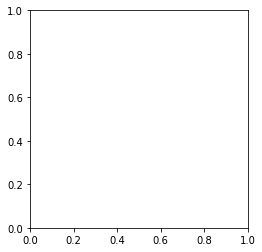

In [13]:
plt.imshow(X_train_sample[0])

In [20]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=(32,32,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(11,activation='softmax'))
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [23]:
model.fit(X_train_sample, y_train_sample, validation_data=(X_test_sample, y_test_sample), epochs=10)

Train on 1500 samples, validate on 750 samples
Epoch 1/10
1500/1500 [==============================] - 4s 3ms/step - loss: 15.0113 - acc: 0.0687 - val_loss: 15.1725 - val_acc: 0.0587
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 15.0113 - acc: 0.0687 - val_loss: 15.1725 - val_acc: 0.0587
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 15.0113 - acc: 0.0687 - val_loss: 15.1725 - val_acc: 0.0587
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 15.0113 - acc: 0.0687 - val_loss: 15.1725 - val_acc: 0.0587
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 15.0113 - acc: 0.0687 - val_loss: 15.1725 - val_acc: 0.0587
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 15.0113 - acc: 0.0687 - val_loss: 15.1725 - val_acc: 0.0587
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 15.0113 - acc: 0.0687 - val_loss: 15.1725 - val_acc: 0.0587
E

In [ ]:
model.evaluate(X_test_sample, y_test_sample)

In [22]:
model = Sequential()
model.add(Conv2D(128, kernel_size=3, activation='relu', input_shape=(32,32,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Conv2D(32, kernel_size=5, activation='relu'))
# model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(11, activation='softmax'))
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])